# Arbres binaires

La classe `BinaryTree`, définie dans le [module `binary_tree.py`](binary_tree.py) proposé ici, permet de représenter des arbres binaires.

In [1]:
import binary_tree as bt

# Manipulation d'arbres binaires

Cette classe comporte 
1. « deux » constructeurs

In [2]:
VIDE = bt.BinaryTree()

qui renvoie l'arbre vide, et 

In [3]:
arbre1 = bt.BinaryTree(12, VIDE, VIDE)

qui renvoie un nœud construit à partir des trois arguments *étiquette*, *sous-arbre gauche*, et *sous-arbre droit*.

2. un reconnaisseur `is_empty()` :  

In [4]:
arbre1.is_empty()

False

3. trois accesseurs `get_data()`, `get_left_subtree()`, et `get_right_subtree()` qui renvoient respectivement l'étiquette, le sous-arbre gauche, et le sous-arbre droit de la racine :

In [5]:
arbre1.get_data()

12

In [6]:
arbre1.get_left_subtree().is_empty()

True

# Visualisation d'arbres binaires

La classe fournit également une méthode `to_dot()` qui renvoie une chaîne de caractères, description au [format DOT](https://fr.wikipedia.org/wiki/DOT_(langage)) de l'arbre. 

Une visualisation peut être réalisée à l'aide du [module `graphviz`de Python](https://pypi.org/project/graphviz/) : 

In [7]:
import graphviz
from IPython.display import display
def show_tree(arbre):
    display(graphviz.Source(arbre.to_dot()))

In [8]:
arbre2 = bt.BinaryTree(2, VIDE, VIDE)
arbre3 = bt.BinaryTree(3, arbre1, arbre2)

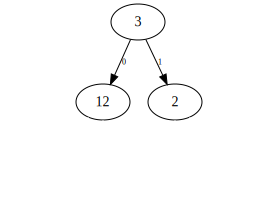

In [9]:
show_tree(arbre3)

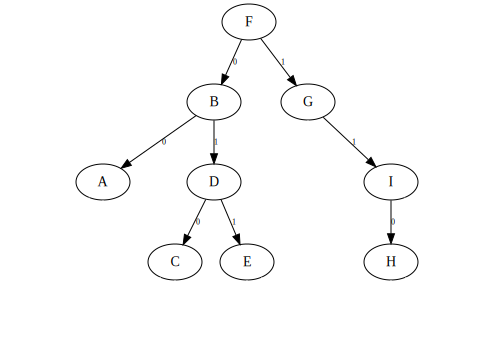

In [10]:
VIDE = bt.BinaryTree()

def feuille(data) :
    return bt.BinaryTree(data, VIDE, VIDE)

arbre5 = bt.BinaryTree(
            "F", 
            bt.BinaryTree(
                "B",
                feuille("A"), 
                bt.BinaryTree("D", feuille("C"), feuille("E"))
                ),
            bt.BinaryTree(
                "G",
                VIDE,
                bt.BinaryTree("I", feuille("H"), VIDE)
                )
            )

show_tree(arbre5)

La classe fournit enfin une méthode `show()` qui produit deux fichiers : 

* une description de l'arbre au format DOT
* une image de cet arbre au format PNG

De plus la méthode visualise cette image. 

Les images produites peuvent par exemple être utilisées dans des documents ressources...


-----

*La suite ce notebook propose des éléments de solution pour les exercices de la 1re séance sur les arbres [gitlab-fil.univ-lille.fr/diu-eil-lil/portail/blob/master/bloc4-5/arbres/arbre1.md](https://gitlab-fil.univ-lille.fr/diu-eil-lil/portail/blob/master/bloc4-5/arbres/arbre1.md)*

# Taille et hauteur d'un arbre binaire

Rappelons que 

* la _taille_ d'un arbre est le nombre de nœuds de l'arbre. 
* la _profondeur_ d'un nœud est le nombre d'arêtes sur la branche qui
  le relie à la racine. La profondeur de la racine est nulle. 
* la _hauteur_ d'un arbre est la profondeur maximale de l'ensemble des
  nœuds de l'arbre.

### ≫ Les taille, hauteur, nombre de feuilles, et nombre de nœuds à chaque profondeur des quatre arbres

1. (1, ∆, ∆) 
2. (3, (1, ∆, (4, (1, ∆, (5, ∆, ∆)), ∆)), ∆)
3. (3, (1, (1, ∆, ∆), ∆), (4, (5, ∆, ∆), (9, ∆, ∆)))
4. (3, (1, (1, ∆, ∆), (5, ∆, ∆)), (4, (9, ∆, ∆), (2, ∆, ∆)))

sont donc  

| arbre | taille | hauteur | nbre feuilles | nbre nœuds à profondeur donnée |
| ----- | ------ | ------- | ------------- | ------------------------------ |
| arbre 1. | 1 | 0 | 1 | à profondeur 0 : 1, à profondeur >0 : 0 |
| arbre 2. | 5 | 4 | 1 | à  profondeur ≤4 : 1, à profondeur >4 : 0 |
| arbre 3. | 6 | 2 | 3 | à profondeur 0 : 1, à profondeur 1 : 2, à profondeur 2 : 3, à profondeur >2 : 0 |
| arbre 4. | 7 | 2 | 4 | à profondeur 0 : 1, à profondeur 1 : 2, à profondeur 2 : 4, à profondeur >2 : 0 |

Ces valeurs peuvent être lues sur la réprésentation graphiques des arbres : 

In [11]:
# (1, ∆, ∆) 
arbre1 = feuille(1)

# (3, (1, ∆, (4, (1, ∆, (5, ∆, ∆)), ∆)), ∆)
arbre2 = bt.BinaryTree(3, 
                       bt.BinaryTree(1, 
                                     VIDE, 
                                     bt.BinaryTree(4, 
                                                   bt.BinaryTree(1, VIDE, feuille(5)), 
                                                   VIDE)), 
                       VIDE)

# (3, (1, (1, ∆, ∆), ∆), (4, (5, ∆, ∆), (9, ∆, ∆)))
arbre3 = bt.BinaryTree(3, 
                       bt.BinaryTree(1, feuille(1), VIDE), 
                       bt.BinaryTree(4, feuille(5), feuille(9)))

# (3, (1, (1, ∆, ∆), (5, ∆, ∆)), (4, (9, ∆, ∆), (2, ∆, ∆)))
arbre4 = bt.BinaryTree(3, 
                       bt.BinaryTree(1, feuille(1), feuille(5)), 
                       bt.BinaryTree(4, feuille(9), feuille(2)))

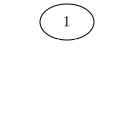

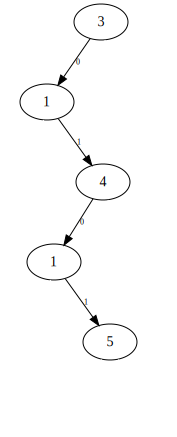

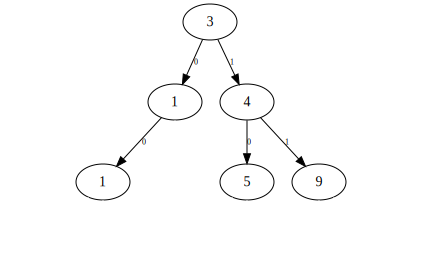

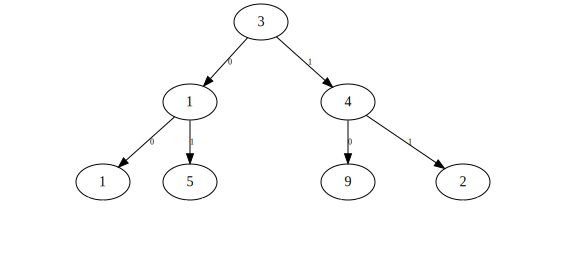

[None, None, None, None]

In [12]:
[show_tree(arbre) for arbre in (arbre1, arbre2, arbre3, arbre4)]

### ≫ Un arbre binaire de hauteur $h$ comporte

* au minimum une feuille et $h+1$ nœuds d'arité 1. \
  Nous avons affaire à un arbre _filiforme_. 
* au maximum $2^{h}$ feuilles. \
  Nous avons affaire à un arbre localement complet. 
* au maximum  et $2^{h+1}-1$ nœuds. \
  Nous avons affaire à un arbre complet. 

### ≫ Squelettes d'arbres binaires 

On appelle squelette ou forme d'arbres binaires tout arbre binaire
dans lequel on ne tient pas compte des étiquettes.

Le nombre de squelettes $c_n$ d'arbres binaires de taille $n = 0, 1, 2, 3, 4, 5$ est le suivant : 

| $n$   |  0  |  1  |  2  |  3  |  4   |  5   |
| ----- | --- | --- | --- | --- | ---- | ---- |
| $c_n$ |  1  |  1  |  2  |  5  |  14  |  42  |


### ≫ Taille

Un algorithme de calcul de la taille d'un arbre binaire est le suivant : « si l'arbre est vide, sa taille est nulle ; sinon sa taille est la taille (nombre de feuilles) de son fils gauche, plus la taille (nombre de feuilles) de son fils droit, plus un (la feuille racine de l'arbre) » : 

```
taille (a) :
    si a est l'arbre vide
        renvoyer 0
    a de la forme (e, g, d)
    taille_g = taille(g) 
    taille_d = taille(d) 
    renvoyer 1 + taille_g + taille_d
```

Que l'on peut mettre en œuvre en Python par 

In [13]:
def size(tree):
    '''
    :param tree: (BinaryTree)
    :return: (int) taille de l'arbre tree
    '''
    if tree.is_empty():
        return 0
    else:
        return 1 + size(tree.get_left_subtree()) + size(tree.get_right_subtree())

Et utiliser avec nos quatre arbres précédents

In [14]:
[size(arbre) for arbre in (arbre1, arbre2, arbre3, arbre4)]

[1, 5, 6, 7]

### ≫ Hauteur

Une démarche identique mène à la fonction suivante pour le calcul de la hauteur : 

In [15]:
def height(tree):
    '''
    :param tree: (BinaryTree)
    :return: (int) hauteur de l'arbre tree
    '''
    if tree.is_empty():
        return -1
    else:
        return 1 + max(height(tree.get_left_subtree()), height(tree.get_right_subtree()))

In [16]:
[height(arbre) for arbre in (arbre1, arbre2, arbre3, arbre4)]

[0, 4, 2, 2]

----

# Caractériser les arbres binaires

Rappelons que 

* Un arbre binaire _**filiforme**_ ou _dégénéré_ est un arbre dans lequel
  tous les _nœuds internes_ n'ont qu'un seul _fils_. 
* Un arbre binaire _**localement complet**_ est
  un arbre dont tous les _nœuds internes_ possèdent exactement deux
  _fils_.
* Un arbre binaire _**complet**_ est un arbre binaire _localement
  complet_ dans lequel toutes les _feuilles_ sont à la même
  _profondeur_. 
* Un arbre binaire _**parfait**_ est un arbre dans lequel tous les
  niveaux sont remplis à l'exception _éventuelle_ du dernier, et dans
  ce cas les feuilles du dernier niveau sont alignées à gauche.

### ≫ Compter les arbres ###

Un arbre localement complet de hauteur $h$ comporte 
* au maximum $2^{n}-1$ nœuds. \
  L'arbre est complet
* au minimum $2n + 1$ nœuds. \
  L'arbre est par exemple un peigne. 

Un arbre complet de hauteur $h$ comporte 
* exactement $2^{h}-1$ nœuds

Le nombre de squelettes d'arbres parfaits de hauteur $h$ est 
* $2^{h-1}-1$ \
  (Le niveau de profondeur $h$ comporte de $1$ à $2^{h-1}$ nœuds) 

Le nombre de squelettes d'arbres filiformes de hauteur $h$ est 
* $2^h$ 

### ≫ Reconnaître ces arbres ###

Des algorithmes pour reconnaître les arbres binaires filiformes, localement complet, complet, et parfait peuvent être construits à partir des éléments suivants : 

Un arbre est filiforme
* si il s'agit de l'arbre vide, ou 
* si sa racine ne possède qu'un fils et que cet arbre fils est filiforme. 

Un arbre binaire est localement complet
* si il s'agit de l'arbre vide, ou
* si sa racine possède exactment deux fils et que ces arbres sont localement complets. 

Un arbre binaire est complet 
* si il s'agit de l'arbre vide, ou 
* si sa racine possède exactement deux fils, que ces arbres sont complets, et que leur hauteur est égale. \
  → On en vient donc à définir un algorithme pour reconnaiter qu'un arbre et complet **et** connaître sa hauteur en un seul parcours de ses fils. 

Pour reconnaître qu'un arbre binaire est parfait, il peut être nécessaire de savoir si ses deux fils gauche et droit sont 1- parfaits, 2- complets, et 3- quelle est leur hauteur. 

### ≫ Superposer deux arbres ###

Proposez un prédicat pour tester l'égalité du squelette de deux arbres
binaires. 

### ≫ Numéroter les nœuds ###

La numérotation de Sosa-Stradonitz des nœuds d'un arbre binaire,
utilisée notamment en généalogie, est la suivante :

* le nœud racine est numéroté par 1
* si un nœud numéroté par $i$
  - son fils gauche est numéroté par $2i$
  - son fils droit est numéroté par $2i + 1$ 

Cette numérotation peut être utilisée pour représenter un arbre dans
un tableau : l'élément $j$ du tableau mémorise le nœud numéroté par
$j$.

Pour représenter

* un arbre binaire complet de $n$ nœuds, un tableau de $n$ éléments est nécessaire
* un arbre binaire parfait de $n$ nœuds, un tableau de $n$ élément est nécessaire 
* un arbre binaire quelconque de $n$ nœuds, le pire des cas est un arbre filiforme "branche droite". L'arbre est alors de hauteur $n-1$. Un tableau de $2^{n+1}$ élément est nécessaire

Cette représentation est donc adaptée pour des arbres complets ou parfaits, éventuellement pour des arbres non-dégénérés. 

----